# Support Vector Machine (SVM)

Support vector machines (SVMs) are powerful yet flexible supervised machine learning methods used for classification, regression, and, outliers’ detection. SVMs are very efficient in high dimensional spaces and generally are used in classification problems. 

The main goal of SVMs is to divide the datasets into number of classes in order to find a maximum marginal hyperplane (MMH) which can be done in the following two steps −

* Support Vector Machines will first generate hyperplanes iteratively that separates the classes in the best way.

* After that it will choose the hyperplane that segregate the classes correctly.

Some important concepts in SVM are as follows −

* Support Vectors − They may be defined as the datapoints which are closest to the hyperplane. Support vectors help in deciding the separating line.

* Hyperplane − The decision plane or space that divides set of objects having different classes.

* Margin − The gap between two lines on the closet data points of different classes is called margin.

In [ ]:
import numpy as np

from sklearn.svm import SVC

# Kernel Function

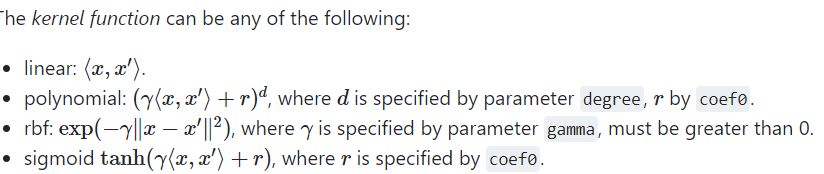

## Example

### Data

In [ ]:
# dataset
from sklearn.datasets import load_iris

# loading dataset
X, Y = load_iris(return_X_y = True)

# printing to see elements
print('X values : \n', X[:5])
print('Y values : \n', Y[:5])

### Creating a Train test split

In [ ]:
# importing train test split
from sklearn.model_selection import train_test_split

# creating a train-test split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                    test_size = 0.4, random_state = 1 )

# printing size of train and test data

print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)

print('Y_train : ', Y_train.shape)
print('Y_test : ', Y_test.shape)

### Creating an SVM Object

In [ ]:
# kernels : ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
svm = SVC(kernel = 'linear',gamma = 'scale')

### Train model on training dataset

In [ ]:
svm.fit(X_train, Y_train)

### Test using trained model

In [ ]:
Y_pred = svm.predict(X_test)

### Accuracy


In [ ]:
# accuracy 
print('Accuracy on Train : ', round(svm.score(X_train, Y_train)*100, 2))
print('Accuracy on Test : ', round(svm.score(X_test, Y_test)*100, 2))
print('Accuracy on Whole Dataset : ', round(svm.score(X, Y)*100, 2))

### Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion Matrix 
result = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(result)

# Classification report
result1 = classification_report(Y_test, Y_pred)
print("\nClassification Report:")
print (result1)

# Accuracy score
result2 = accuracy_score(Y_test, Y_pred)
print("\nAccuracy:",result2)

# Gridsearch

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

In [ ]:

# defining parameter range 
param_grid = {'C': [0.1, 1,2, 5, 8, 10, 100],  
              #'gamma': [1, 0.1, 0.08, 0.05, 0.02, 0.01, 0.001], 
              #'coef0' : [10, 1, 0.1, 0.08, 0.05, 0.02, 0.01, 0.001],
              'kernel': ['linear']} 


grid = GridSearchCV(SVC(class_weight = 'balanced'), param_grid, verbose = False, cv = 5) 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)

# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 